<h2 style='color:blue' align='center'>DISCHARGE COST PREDICTION</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('ntrvyadaya.csv')
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,DAYS
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-06-13 0:00,09-07-13,NO,NaN,D,31
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08-08-13 0:00,09-09-13,NO,NaN,D,32
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15-08-13 0:00,18-10-13 0:00,NO,NaN,D,64
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24-08-13 0:00,27-09-13 0:00,NO,NaN,D,34
4,9,56,Male,OC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.1.1.1,Coronary Balloon Angioplasty with stent(00.45),Vallur,Kakumanu,...,Karumuri Hospital,C,GUNTUR,Guntur,14-06-14 0:00,16-06-14,NO,NaN,D,2


# EDA ON CLAIM_AMOUNT

# The below barplot represents comparsion between caste name,age and Sex.

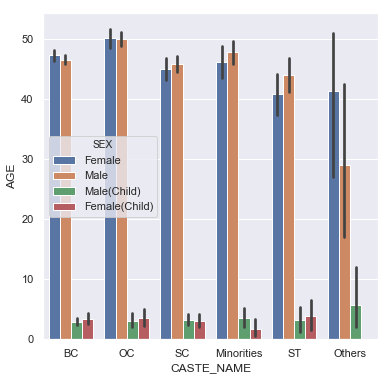

In [2]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x='CASTE_NAME',y='AGE',hue='SEX',data=data,) 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

<h2 style='color:blue' align='center'>The below plotting represents the total count of CASTE_NAME.</h2>

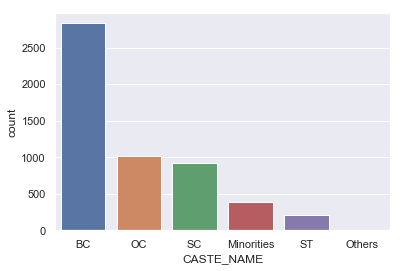

In [3]:
sns.countplot(x='CASTE_NAME',data=data)

#  The below barplot represents comparsion between caste_name and claim amount

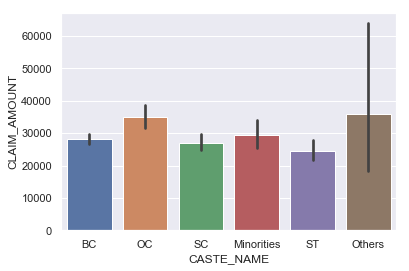

In [4]:
sns.barplot(x='CASTE_NAME',y='CLAIM_AMOUNT',data=data)

# The below plotting represents total count of Sex(Male,Female) .

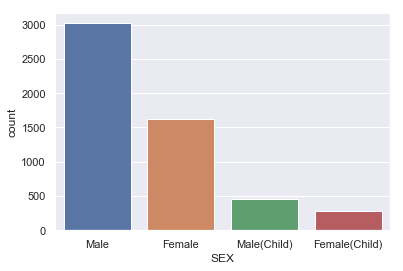

In [5]:
sns.countplot(x='SEX',data=data,order = data['SEX'].value_counts().index)

# The below bar represents comparsion between sex and claim amount

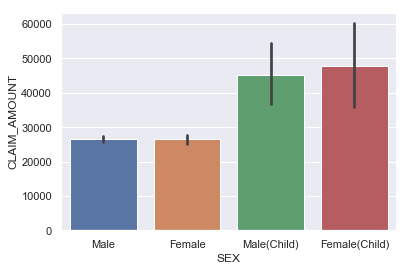

In [6]:
sns.barplot(y='CLAIM_AMOUNT',x='SEX',data=data,order = data['SEX'].value_counts().index)

# The below plotting represents total count of Category Name.

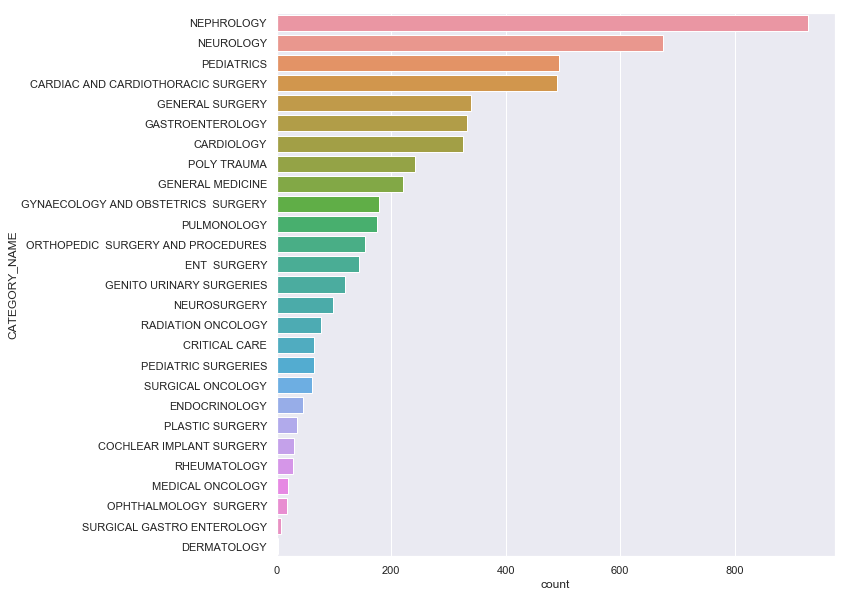

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(y='CATEGORY_NAME',data=data,order=data['CATEGORY_NAME'].value_counts().index)

# The below bar represents comparsion between category name and claim amount.

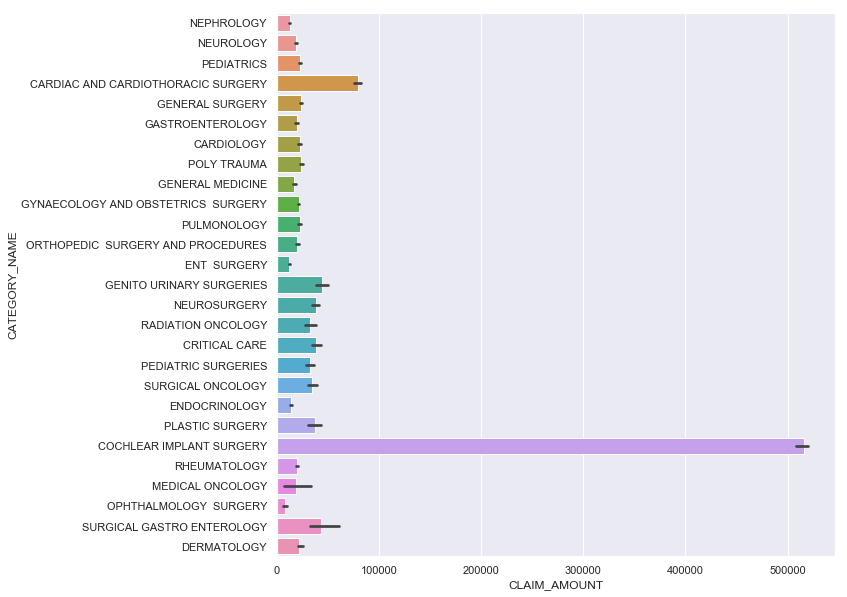

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(y='CATEGORY_NAME',x='CLAIM_AMOUNT',data=data,order=data['CATEGORY_NAME'].value_counts().index)

# The below barplot represents comparsion between Hospital type and claim amount.

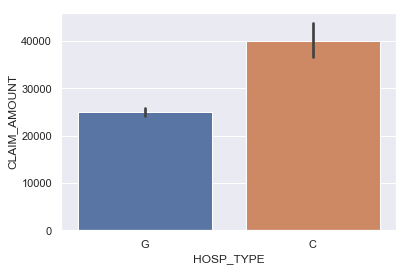

In [9]:
sns.barplot(y='CLAIM_AMOUNT',x='HOSP_TYPE',data=data)

In [10]:
#data.info()

In [11]:
#data.describe()

In [12]:
#data.isnull().sum()

In [13]:
data.drop(['MORTALITY_DATE'],inplace=True,axis=1)
data_num=data.select_dtypes(include=[np.number])
data_cat=data.select_dtypes(include=[object])
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
data_cat=data_cat.apply(L.fit_transform)
data1=pd.concat([data_num,data_cat],axis=1)

# Visualization for correlations

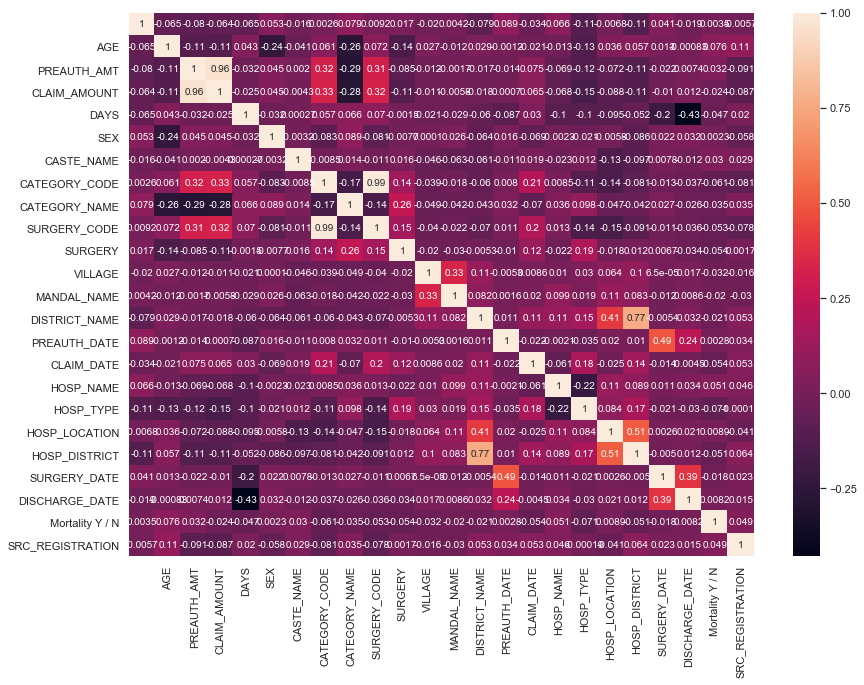

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(data1.corr(),annot=True)
plt.show()

# Feature selection

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data1.drop('CLAIM_AMOUNT',1),data1['CLAIM_AMOUNT'],test_size=0.3, random_state=10)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
#print('Score list:', select_feature.scores_)
#print('Feature list:', x_train.columns)

In [16]:
x1=data1[['SEX','CASTE_NAME','CATEGORY_NAME','SURGERY_CODE','SURGERY','VILLAGE','MANDAL_NAME','CLAIM_DATE','HOSP_TYPE','DISCHARGE_DATE','Mortality Y / N']]
y1=data1['CLAIM_AMOUNT']
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

# RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
frst = RandomForestRegressor()
frst.fit(x1_train,y1_train)
frstpred = frst.predict(x1_test)
frst.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Fittting score 

In [18]:
score=frst.score(x1_train,y1_train)*100
print('SCORE IS:',score)

SCORE IS: 98.85717072361174


In [19]:
#data1.to_csv("ntra1.csv")

In [20]:
amount=pd.read_csv("ntra1.csv")
prs=frst.predict(amount)
amount['predict_amount']=prs

In [21]:
amount.to_csv('predicted_amount2.csv')

<h2 style='color:blue'align='center'>THESE ARE YOUR INPUT FEATURES.</h2>

In [22]:
x1_test.head(5)

,SEX,CASTE_NAME,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,CLAIM_DATE,HOSP_TYPE,DISCHARGE_DATE,Mortality Y / N
410,2,0,15,168,108,7,128,697,1,345,0
5294,3,2,19,44,210,1485,491,156,1,370,0
2803,2,2,14,108,191,21,407,6,1,331,0
3957,2,2,1,95,8,2067,519,88,0,76,0
4577,2,0,23,224,283,1815,2,19,0,182,0


<h2 style='color:red'align='center'>The below values is your Target(AMOUNT)</h2>

In [23]:
y1_test.head(5)

410     26650
5294    20000
2803    20000
3957    70000
4577    65000
Name: CLAIM_AMOUNT, dtype: int64

# Predicted amount.

In [24]:
frst.predict([[2,0,15,168,108,7,128,697,1,345,0]])

array([25395.])